# Use Customer_Segmentation Notebook Template

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary cache directory at /tmp/matplotlib-46dc4k36 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [1]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [2]:
table_name = 'CUSTOMER_TRANSACTION_MASTER'

sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [3]:
df.shape

(122882, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122882 entries, 0 to 122881
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CUSTOMER_ID                       122882 non-null  object 
 1   DATE                              122882 non-null  object 
 2   AGE                               122882 non-null  int8   
 3   SEX                               122882 non-null  object 
 4   EDUCATION_LEVEL                   122882 non-null  object 
 5   EMPLOYMENT_STATUS                 122882 non-null  object 
 6   HOBBIES                           122882 non-null  object 
 7   MARITAL_STATUS                    122882 non-null  object 
 8   DEPENDENTS                        122882 non-null  object 
 9   REGISTRATION_DATE                 122882 non-null  object 
 10  BANK_ACCOUNT_TYPE                 122882 non-null  object 
 11  BALANCE                           122882 non-null  f

In [8]:
df.tail()

,CUSTOMER_ID,DATE,AGE,SEX,EDUCATION_LEVEL,EMPLOYMENT_STATUS,HOBBIES,MARITAL_STATUS,DEPENDENTS,REGISTRATION_DATE,...,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
122877,3a7ce3d5-0f4b-4575-badc-3553f5440c92,2023-05-01,32,MALE,High School,Unemployed,reading,Single,One Dependent,2020-03-12,...,684.4068,305.7313,339.07230,Very high,Low,Very high,21.20,273.352691,242.288921,0.0
122878,e2a8f308-57eb-4f55-bc13-399378f246d3,2022-12-01,27,MALE,PhD,Unemployed,camping,Single,One Dependent,2009-05-12,...,535.0963,0.0000,482.58685,Very high,Very low,Very high,25.92,474.722440,165.534652,0.0
122879,599c0e61-9bbc-4e14-bbfd-b07f5a398669,2022-12-01,33,FEMALE,High School,Unemployed,video-games,Single,One Dependent,2007-02-12,...,0.0000,0.0000,0.00000,Very low,Very low,Very low,0.00,568.542708,549.300475,0.0
122880,77298902-f899-4c3e-9104-06d1736fb089,2023-06-01,33,FEMALE,College,Unemployed,basketball,Single,One Dependent,2001-02-12,...,0.0000,0.0000,0.00000,Very low,Very low,Very low,0.00,517.588408,544.214360,0.0
122881,cd75294e-c31f-41b3-b78c-1d3e7322ddcf,2022-12-01,44,FEMALE,High School,Employed,exercise,Married,Two Dependents,2001-02-12,...,0.0000,0.0000,0.00000,Very low,Very low,Very low,0.00,1029.696570,1552.899035,0.0


In [8]:
categorical_cols = ['SEX','EDUCATION_LEVEL','EMPLOYMENT_STATUS','HOBBIES','MARITAL_STATUS','DEPENDENTS','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']

In [9]:
numerical_data = df.select_dtypes(include='number')

print(f"----Maximum Values----\n{numerical_data.max()}")
print(f"\n\n----Minimum Values----\n{numerical_data.min()}")
print(f"\n\n----Average Values----\n{numerical_data.mean()}")

----Maximum Values----
AGE                          70.000000
BALANCE                   20160.158820
CREDIT_LIMIT              30240.000000
CASH_ADVANCE              47137.211760
CASH_ADVANCE_FREQUENCY        1.500000
CASH_ADVANCE_TRX            123.000000
PURCHASES                 49039.570000
ONEOFF_PURCHASES          43873.984800
INSTALLMENTS_PURCHASES    22500.000000
PURCHASES_TRX               378.230000
PAYMENTS                  51154.352082
MINIMUM_PAYMENTS          76406.207520
PRC_FULL_PAYMENT              1.000000
dtype: float64


----Minimum Values----
AGE                       18.0
BALANCE                    0.0
CREDIT_LIMIT               0.0
CASH_ADVANCE               0.0
CASH_ADVANCE_FREQUENCY     0.0
CASH_ADVANCE_TRX           0.0
PURCHASES                  0.0
ONEOFF_PURCHASES           0.0
INSTALLMENTS_PURCHASES     0.0
PURCHASES_TRX              0.0
PAYMENTS                   0.0
MINIMUM_PAYMENTS           0.0
PRC_FULL_PAYMENT           0.0
dtype: float64


----Averag

#### Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. 

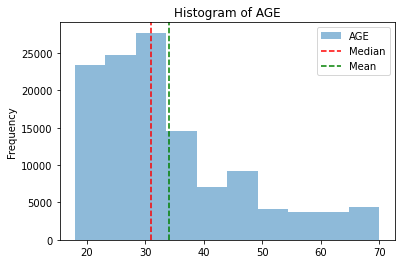

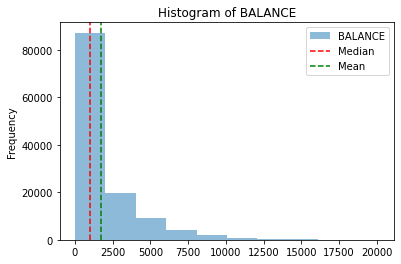

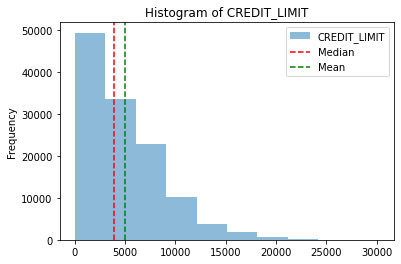

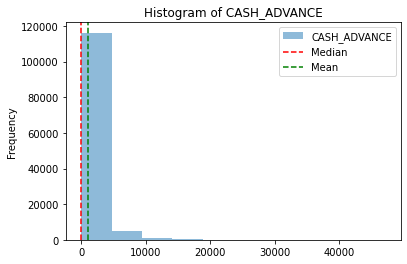

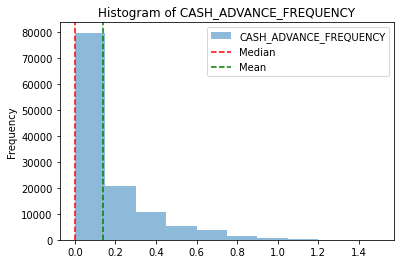

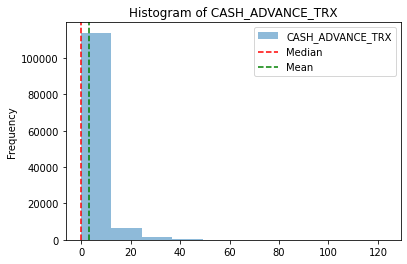

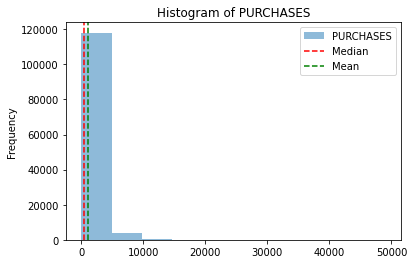

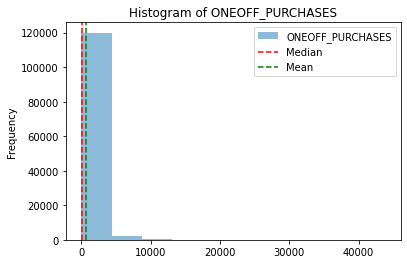

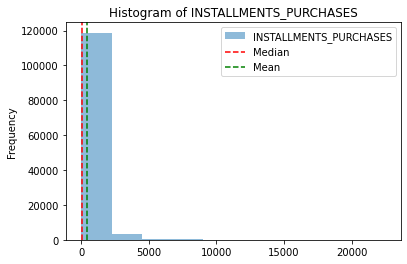

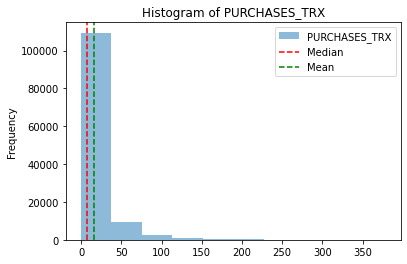

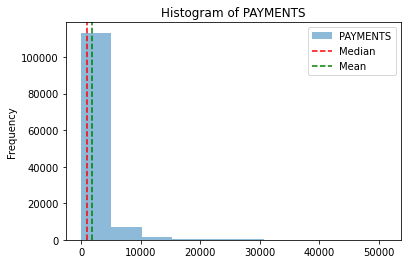

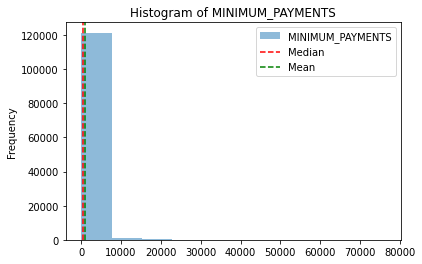

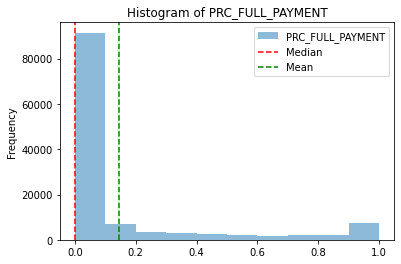

In [10]:
for col in numerical_data.columns:
    plt.title(f'Histogram of {col}')
    numerical_data[col].plot(kind='hist', alpha=0.5)
    plt.axvline(x=numerical_data[col].median(), color='red', linestyle='dashed', label='Median')
    plt.axvline(x=numerical_data[col].mean(), color='green', linestyle='dashed', label='Mean')
    plt.legend()
    plt.show()
    print('\n\n')

### Display the box plot for each numerical column.

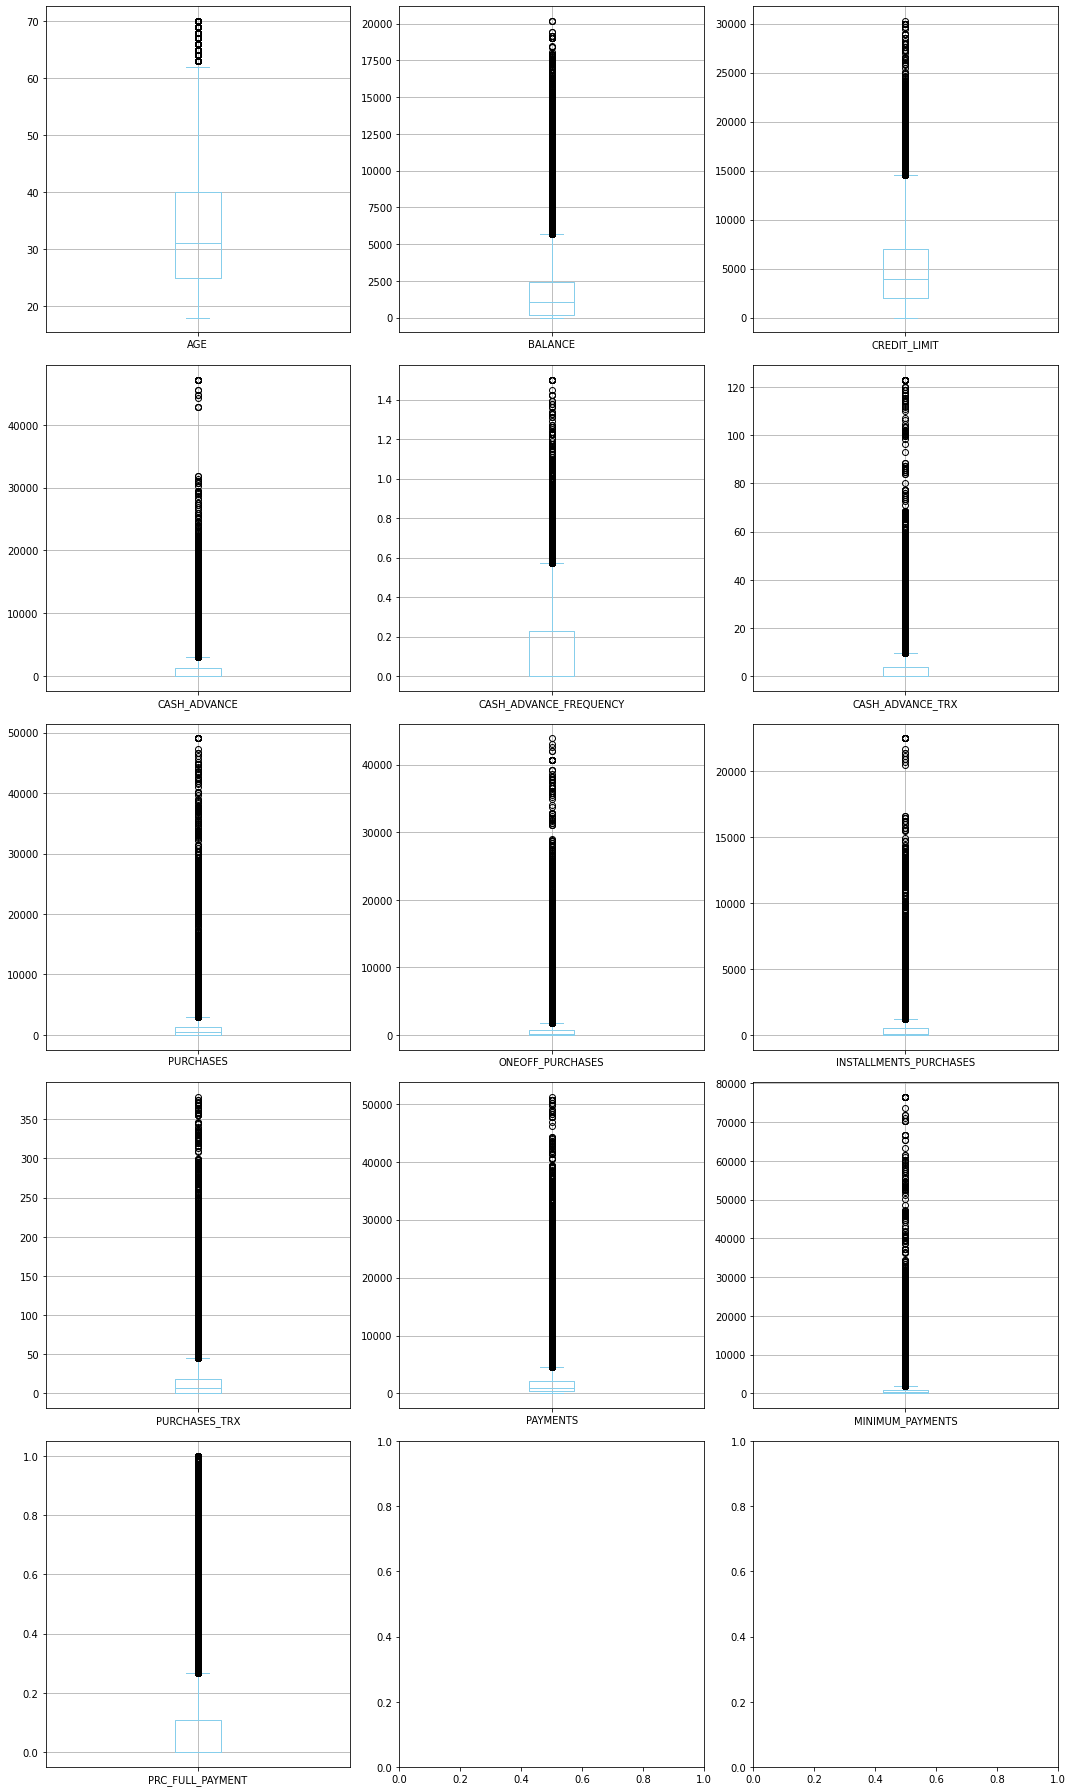

In [11]:
num_cols = numerical_data.shape[1]
num_rows = 3
num_figures = (num_cols // num_rows) + 1

fig, axes = plt.subplots(nrows=num_figures, ncols=num_rows, figsize=(15, 25))
axes = axes.ravel()

for i, column in enumerate(numerical_data.columns):
    if i < num_cols:
        numerical_data.boxplot(column, ax=axes[i], color='skyblue')
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Show the correlation between columns by plotting the heatmap of correlation coefficients.

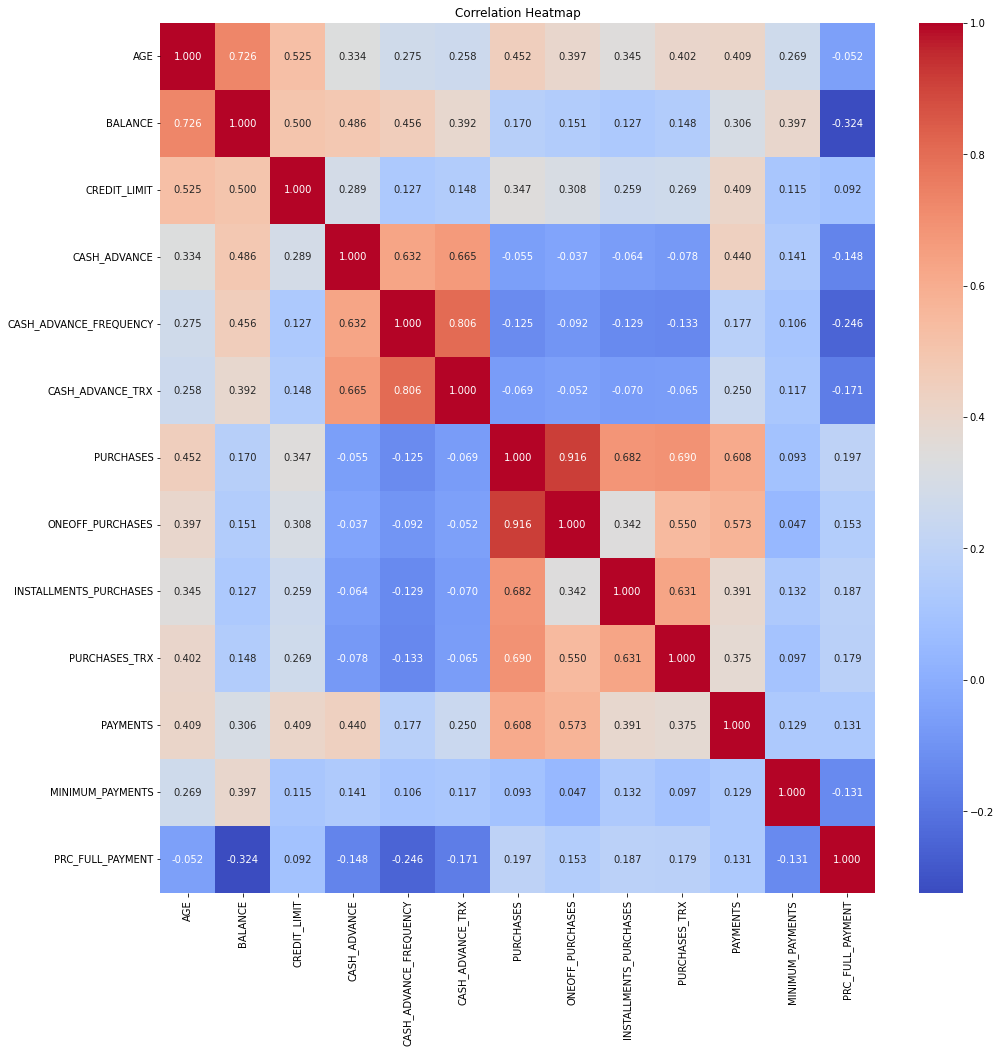

In [12]:
corr = numerical_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()